In [1]:
import pandas as pd
import numpy as np
from pycaret.classification import *


In [2]:
df = pd.read_csv('D:/downloads/fred_quarterly/fred_quarterly.csv')


In [3]:
df


,date,month,quarter,gnp,gdpdef,gdp,Target
0,1/1/2000,2000-01,2000Q1,10035.26300,77.325,10002.179,12935.252
1,4/1/2000,2000-04,2000Q2,10283.39100,77.807,10247.720,13170.749
2,7/1/2000,2000-07,2000Q3,10348.64500,78.263,10318.165,13183.890
3,10/1/2000,2000-10,2000Q4,10490.43000,78.688,10435.744,13262.250
4,1/1/2001,2001-01,2001Q1,10510.29700,79.204,10470.231,13219.251
5,4/1/2001,2001-04,2001Q2,10647.42700,79.683,10599.000,13301.394
6,7/1/2001,2001-07,2001Q3,10623.03900,79.996,10598.020,13248.142
7,10/1/2001,2001-10,2001Q4,10748.40800,80.245,10660.465,13284.881
8,1/1/2002,2002-01,2002Q1,10833.14300,80.504,10783.500,13394.910
9,4/1/2002,2002-04,2002Q2,10918.38400,80.783,10887.460,13477.356


In [4]:
df.dtypes

date        object
month       object
quarter     object
gnp        float64
gdpdef     float64
gdp        float64
Target     float64
dtype: object

In [5]:
df_train = df.sample(frac=0.9 , random_state =60)

In [6]:
df_train.shape


(77, 7)

In [7]:
df_test = df.drop(df_train.index)

In [8]:
df_test.shape

(9, 7)

In [9]:
df_train.reset_index(drop=True , inplace=True )

In [10]:
df_test.reset_index(drop=True , inplace=True )

In [11]:
df_test


,date,month,quarter,gnp,gdpdef,gdp,Target
0,7/1/2002,2002-07,2002Q3,11027.515,81.172,10984.040,13531.741
1,10/1/2003,2003-10,2003Q4,11851.792,83.306,11772.234,14131.379
2,4/1/2004,2004-04,2004Q2,12185.610,84.569,12112.815,14323.017
3,4/1/2008,2008-04,2008Q2,15023.210,94.130,14865.701,15792.773
4,7/1/2008,2008-07,2008Q3,15075.730,94.840,14898.999,15709.562
5,4/1/2016,2016-04,2016Q2,18827.942,105.636,18611.617,17618.581
6,7/1/2017,2017-07,2017Q3,19864.059,107.903,19558.693,18126.226
7,1/1/2018,2018-01,2018Q1,20460.314,109.261,20143.716,18436.262
8,4/1/2019,2019-04,2019Q2,21564.924,112.152,21289.268,18982.528


In [12]:
from pycaret.regression import *


In [13]:
reg = setup(data=df_train,
            target ='Target',
           session_id=123) #use to reproducing the result

,Description,Value
0,session_id,123
1,Target,Target
2,Original Data,"(77, 7)"
3,Missing Values,False
4,Numeric Features,3
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(53, 17)"


In [14]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
en,Elastic Net,126.2057,28067.6050,160.1817,0.9829,0.0105,0.0083,0.0050
lasso,Lasso Regression,135.5858,31496.8247,170.9268,0.9822,0.0112,0.0089,0.0050
ridge,Ridge Regression,135.7001,31384.7205,170.7103,0.9822,0.0112,0.0089,0.0040
lr,Linear Regression,140.6523,33242.1424,176.3322,0.9814,0.0116,0.0092,0.2360
knn,K Neighbors Regressor,126.0902,29749.1677,161.9027,0.9813,0.0101,0.0079,0.0260
omp,Orthogonal Matching Pursuit,146.9917,32848.9221,172.0099,0.9787,0.0110,0.0095,0.0050
br,Bayesian Ridge,147.0810,32844.1197,172.0298,0.9787,0.0110,0.0095,0.0040
llar,Lasso Least Angle Regression,152.5185,35601.1034,181.4611,0.9772,0.0117,0.0099,0.0040
rf,Random Forest Regressor,136.2290,45766.7955,183.1560,0.9703,0.0112,0.0085,0.1500
lar,Least Angle Regression,183.7167,56652.2231,218.8021,0.9634,0.0143,0.0119,0.0040


In [15]:
#cretaing modelin elastic net regression
en = create_model("en") 

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,75.6823,9767.3896,98.8301,0.9974,0.0067,0.0048
1,156.3320,59325.5469,243.5684,0.9492,0.0140,0.0092
2,135.4146,29283.3301,171.1237,0.9923,0.0107,0.0086
3,52.1682,4772.1963,69.0811,0.9988,0.0050,0.0037
4,154.8748,34548.7422,185.8729,0.9857,0.0126,0.0104
5,168.5287,39326.0625,198.3080,0.9895,0.0135,0.0116
6,90.2203,15176.1143,123.1914,0.9888,0.0080,0.0058
7,116.7832,20642.3320,143.6744,0.9947,0.0088,0.0072
8,178.1893,35945.3555,189.5926,0.9539,0.0132,0.0123
9,133.8637,31888.9805,178.5749,0.9785,0.0128,0.0096


In [16]:
#This model is manually made so we have to tune it or gradient boosting
tuned_en = tune_model(en)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,76.2420,9896.6982,99.4821,0.9973,0.0067,0.0049
1,154.8102,58415.0430,241.6920,0.9500,0.0139,0.0091
2,135.9772,29507.8535,171.7785,0.9922,0.0107,0.0087
3,51.3475,4700.3408,68.5590,0.9988,0.0050,0.0036
4,154.4898,34454.9922,185.6206,0.9857,0.0126,0.0104
5,168.9086,39347.8242,198.3629,0.9895,0.0135,0.0116
6,89.4736,15140.9824,123.0487,0.9888,0.0080,0.0058
7,118.4506,21079.6426,145.1883,0.9946,0.0089,0.0073
8,178.3506,35956.3945,189.6217,0.9538,0.0132,0.0123
9,134.8572,32184.1289,179.3994,0.9783,0.0128,0.0096


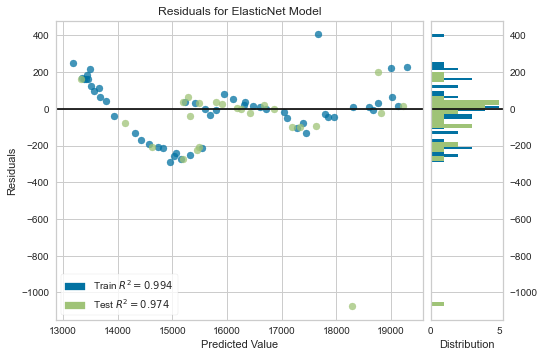

In [17]:
#plotting the model we made
plot_model(tuned_en)

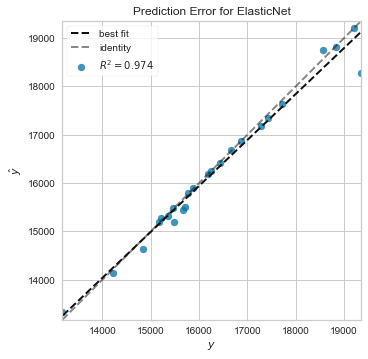

In [18]:
#we make prediction here.
plot_model(tuned_en, plot="error")#error parameter used to prediction plot error 

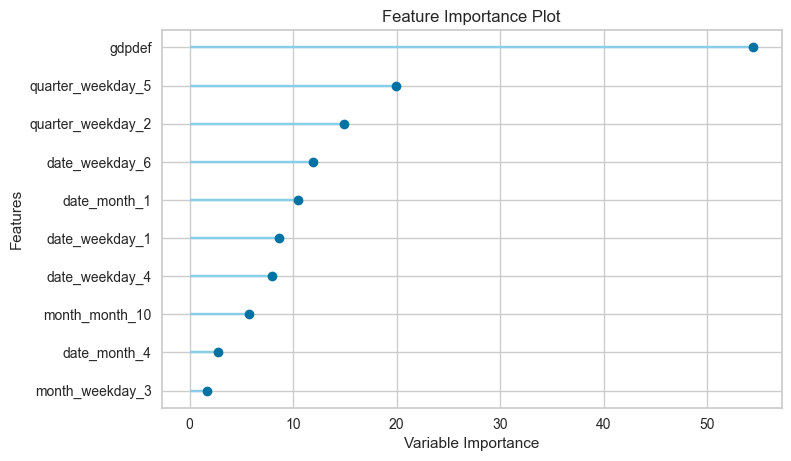

In [19]:
#percent impact of a particular category on target
plot_model(tuned_en ,plot="feature" )

In [20]:
#predicted valu
predict_model(tuned_en)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Elastic Net,126.3243,61543.7109,248.0801,0.9737,0.0138,0.0075


,gnp,gdpdef,date_month_1,date_month_4,date_weekday_1,date_weekday_4,date_weekday_6,date_is_month_end_0,date_is_month_start_1,month_month_10,month_weekday_3,month_is_month_end_0,month_is_month_start_1,quarter_weekday_2,quarter_weekday_5,quarter_is_month_end_0,quarter_is_month_start_1,Target,Label
0,21365.412109,113.888000,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,18560.773438,18759.828125
1,15780.005859,97.988998,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,15876.838867,15903.585938
2,14857.341797,93.654999,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,15702.906250,15497.093750
3,20922.082031,117.379997,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,19358.175781,18283.126953
4,14681.750977,92.932999,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,15671.605469,15449.783203
5,18520.402344,104.988998,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,17437.080078,17338.294922
6,18995.777344,105.929001,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,17724.488281,17628.474609
7,17691.164062,103.525002,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,16868.109375,16866.033203
8,14258.593750,91.838997,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,15478.956055,15203.415039
9,21254.333984,111.514000,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,18833.195312,18810.523438


In [21]:
test_pred = predict_model(tuned_en, data=df_test  )

In [22]:
test_pred.tail()

,date,month,quarter,gnp,gdpdef,gdp,Target,Label
4,7/1/2008,2008-07,2008Q3,15075.730,94.840,14898.999,15709.562,15589.371094
5,4/1/2016,2016-04,2016Q2,18827.942,105.636,18611.617,17618.581,17529.273438
6,7/1/2017,2017-07,2017Q3,19864.059,107.903,19558.693,18126.226,18114.675781
7,1/1/2018,2018-01,2018Q1,20460.314,109.261,20143.716,18436.262,18409.810547
8,4/1/2019,2019-04,2019Q2,21564.924,112.152,21289.268,18982.528,19000.250000


In [23]:
save_model(tuned_en,"")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='Target',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy=...
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  ElasticNet(alpha=0.71, copy_X=True, fit_intercept=True,
  

In [24]:
save_model(tuned_en,"REG MODEL")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='Target',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy=...
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  ElasticNet(alpha=0.71, copy_X=True, fit_intercept=True,
  

In [25]:
saved_final_model=load_model("REG MODEL")

Transformation Pipeline and Model Successfully Loaded


In [26]:
new_prediction= predict_model(saved_final_model, data=df)

In [27]:
new_prediction

,date,month,quarter,gnp,gdpdef,gdp,Target,Label
0,1/1/2000,2000-01,2000Q1,10035.26300,77.325,10002.179,12935.252,13184.109375
1,4/1/2000,2000-04,2000Q2,10283.39100,77.807,10247.720,13170.749,13331.894531
2,7/1/2000,2000-07,2000Q3,10348.64500,78.263,10318.165,13183.890,13353.486328
3,10/1/2000,2000-10,2000Q4,10490.43000,78.688,10435.744,13262.250,13423.115234
4,1/1/2001,2001-01,2001Q1,10510.29700,79.204,10470.231,13219.251,13380.139648
...,...,...,...,...,...,...,...,...
81,4/1/2020,2020-04,2020Q2,19649.44200,112.859,19477.444,17258.205,17663.433594
82,7/1/2020,2020-07,2020Q3,21365.41200,113.888,21138.574,18560.774,18759.828125
83,10/1/2020,2020-10,2020Q4,21728.22300,114.439,21477.597,18767.778,18991.894531
84,1/1/2021,2021-01,2021Q1,22273.06000,115.652,22038.226,19055.655,19284.267578
